In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [26]:
github_storage = "https://raw.githubusercontent.com/oeg-upm/Instituto-Estudios-Fiscales-ontologias/master/machine-learning/"
original_file = github_storage+"datos-IVA.csv"

# Leer csv donde se encuentran los datos
df = pd.read_csv(original_file, sep=";", engine='python', header=None, names=['persona.actividadEmpresarial','sujetoPasivo.domicilioFiscal','operacion.tipoOperacion','operacion.lugarRealizacion','operacion.exencion','factura.importe','factura.fecha','operacion.docs','exencion.hechoImponibleCubiertoEnExencion','factura.descripcion','sujetoPasivo.acogidoARegimenEspecial','numFacturasMismoTopico','infraccion','tipoInfraccion'])
df = df.drop([0]) #eliminado porque no se lee bien la primera línea
df = df.drop(columns=['exencion.hechoImponibleCubiertoEnExencion']) #eliminado pues no tiene valores relevantes
df


,persona.actividadEmpresarial,sujetoPasivo.domicilioFiscal,operacion.tipoOperacion,operacion.lugarRealizacion,operacion.exencion,factura.importe,factura.fecha,operacion.docs,factura.descripcion,sujetoPasivo.acogidoARegimenEspecial,numFacturasMismoTopico,infraccion,tipoInfraccion
1,venta de ropa,Toledo,adquisicion de bienes,Madrid,ExencionRecargoEquivalencia,140.0,22/7/21,Camisa de hombre de color blanco. Pantalón vaq...,Camisa de hombre de color blanco. Pantalón vaq...,RecargoEquivalencia,2.0,false,NaN
2,venta de calzado,Madrid,adquisicion de bienes,Madrid,ExencionRecargoEquivalencia,180.0,23/7/21,Mocasines de piel de color marrón,Mocasines de piel de color marrón,RecargoEquivalencia,3.0,false,NaN
3,venta de ropa,Toledo,adquisicion de bienes,Toledo,ExencionRecargoEquivalencia,230.0,24/7/21,Camisa de hombre de color azul. Pantalones de ...,Camisa de hombre de color azul. Pantalones de ...,RecargoEquivalencia,20.0,false,NaN
4,venta de calzado,Avila,adquisicion de bienes,Avila,ExencionRecargoEquivalencia,120.0,25/7/21,Zapatillas de deporte Adidas. Zapatos de cabal...,Zapatillas de deporte Adidas. Zapatos de cabal...,RecargoEquivalencia,15.0,false,NaN
5,venta de artículos de piel,Madrid,adquisicion de bienes,Toledo,ExencionRecargoEquivalencia,560.0,26/7/21,Abrigo de visón largo con mangas anchas,Abrigo de visón largo con mangas anchas,RecargoEquivalencia,2.0,true,infraccionEnAdquisicionDeBienes
6,joyería,Toledo,adquisicion de bienes,Madrid,ExencionRecargoEquivalencia,1200.0,27/7/21,Reloj de oro con incrustaciones de diamantes,Reloj de oro con incrustaciones de diamantes,RecargoEquivalencia,3.0,true,infraccionEnAdquisicionDeBienes
7,materiales de construcción,Avila,adquisicion de bienes,Avila,ExencionRecargoEquivalencia,3400.0,28/7/21,45 kg de cemento. 20 metros cuadrados de azule...,45 kg de cemento. 20 metros cuadrados de azule...,RecargoEquivalencia,1.0,true,infraccionEnAdquisicionDeBienes
8,joyería,Madrid,adquisicion de bienes,Madrid,ExencionRecargoEquivalencia,1800.0,29/7/21,Collar de perlas.,Collar de perlas.,RecargoEquivalencia,5.0,true,infraccionEnAdquisicionDeBienes
9,materiales de construcción,Madrid,prestación de servicios,Madrid,0,3500.0,30/7/21,45 kg de cemento. 20 metros cuadrados de azule...,45 kg de cemento. 20 metros cuadrados de azule...,0,20.0,false,NaN
10,obras y edificaciones,Madrid,prestación de servicios,Madrid,0,12000.0,31/7/21,Instalación de ventanas en habitaciones. Remod...,Instalación de ventanas en habitaciones. Remod...,0,3.0,false,NaN


In [27]:
numeric_features = ['factura.importe', 'numFacturasMismoTopico']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['persona.actividadEmpresarial', 'sujetoPasivo.domicilioFiscal', 'operacion.tipoOperacion', 'operacion.lugarRealizacion', 'operacion.exencion', 'sujetoPasivo.acogidoARegimenEspecial']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Features that are not covered yet: 
# factura.fecha
# operacion.docs
# factura.descripcion
# infraccion
# tipoInfraccion


# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])


In [28]:
X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(df.iloc[:,0:11],df['infraccion'],test_size=0.2, shuffle = True, random_state=0)
print(X_Train)
print(Y_Train)
print(X_Test)
print(Y_Test)

datatypes = df.dtypes
print('Data type of each column of Dataframe :')
print(datatypes)
filteredColumns = df.dtypes[df.dtypes == np.object] # list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)


clf.fit(X_Train,Y_Train)
print("model score: %.3f" % clf.score(X_Test, Y_Test))
clf.predict(X_Test)

   persona.actividadEmpresarial  ... numFacturasMismoTopico
2              venta de calzado  ...                    3.0
14        obras y edificaciones  ...                    3.0
24                venta de ropa  ...                   23.0
17         venta de electrónica  ...                    4.0
9    materiales de construcción  ...                   20.0
7    materiales de construcción  ...                    1.0
18                venta de ropa  ...                   25.0
5    venta de artículos de piel  ...                    2.0
3                 venta de ropa  ...                   20.0
6                       joyería  ...                    3.0
19             venta de calzado  ...                   30.0
10        obras y edificaciones  ...                    3.0
8                       joyería  ...                    5.0
20                      joyería  ...                   22.0
4              venta de calzado  ...                   15.0
1                 venta de ropa  ...    

array(['false', 'true', 'false', 'true', 'true'], dtype=object)

Matriz de confusion test: 


<Figure size 432x288 with 0 Axes>

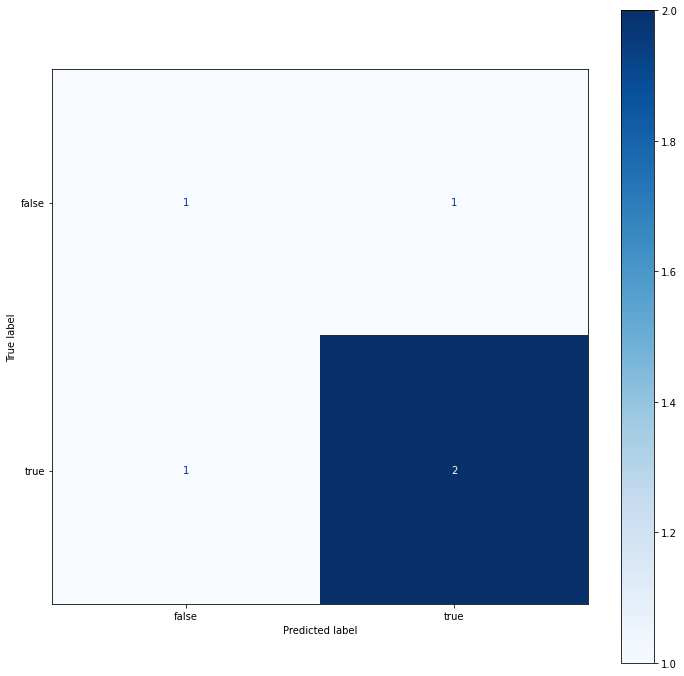

Matriz de confusion train: 


<Figure size 432x288 with 0 Axes>

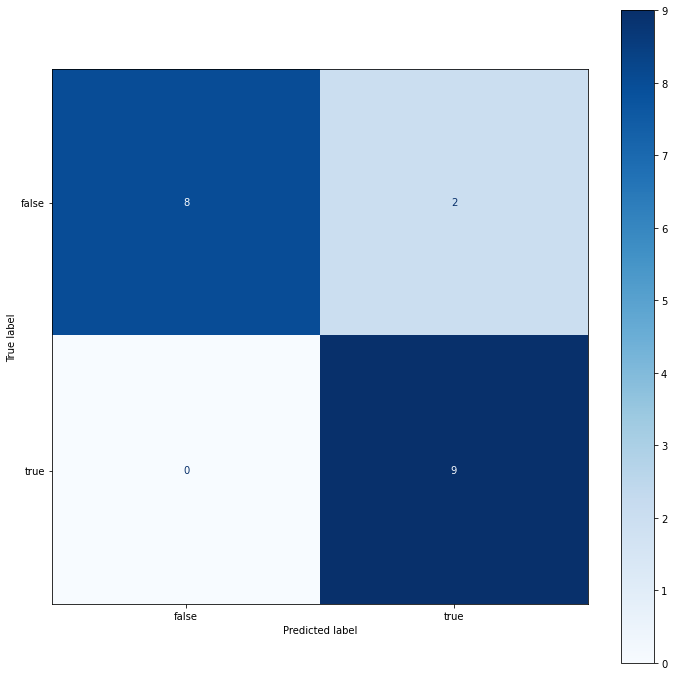

In [29]:
# Evaluacion del modelo 
print("Matriz de confusión test: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(clf, X_Test, Y_Test, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

print("Matriz de confusión train: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(clf, X_Train, Y_Train, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 
